In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/creditcard.csv')

# Check the distribution of the target variable 'Class'
class_distribution = data['Class'].value_counts(normalize=True) * 100

# Print the distribution
print(class_distribution)

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [ ]:
'''V17, V14, V12, V10, V16: Given their high correlation with fraud, these features might reflect suspicious activity patterns,
like unusual transaction frequencies, amounts, or merchant types.'''
'''V3, V7, V11: These could indicate patterns of spending or withdrawals,
such as the time and day of transactions or consistency in spending that deviates from the norm.'''
'''V4: With its moderate correlation, it could relate to transactional relationships,
such as similarity to previous transactions (same location, similar time, etc.).'''

import pandas as pd

# Load the dataset (replace with your file path in Colab if different)
data = pd.read_csv('/content/creditcard.csv')

# Define selected features
selected_features = [
    'V3', 'V4', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27', 'Class'
]

# Create a new DataFrame with only the selected features
filtered_data = data[selected_features]

# Save the filtered dataset as a new CSV file
filtered_data.to_csv('/content/filtered_creditcard.csv', index=False)

print("Filtered dataset saved as 'filtered_creditcard.csv'.")


Filtered dataset saved as 'filtered_creditcard.csv'.


In [ ]:
import pandas as pd
# Load the filtered dataset
filtered_data = pd.read_csv('/content/filtered_creditcard.csv')

# Display the first 5 rows
print(filtered_data.head())


         V3        V4        V7       V10       V12       V14       V16  \
0  2.536347  1.378155  0.239599  0.090794 -0.617801 -0.311169 -0.470401   
1  0.166480  0.448154 -0.078803 -0.166974  1.065235 -0.143772  0.463917   
2  1.773209  0.379780  0.791461  0.207643  0.066084 -0.165946 -2.890083   
3  1.792993 -0.863291  0.237609 -0.054952  0.178228 -0.287924 -1.059647   
4  1.548718  0.403034  0.592941  0.753074  0.538196 -1.119670 -0.451449   

        V17       V18       V19       V20       V21       V27  Class  
0  0.207971  0.025791  0.403993  0.251412 -0.018307  0.133558    0.0  
1 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775 -0.008983    0.0  
2  1.109969 -0.121359 -2.261857  0.524980  0.247998 -0.055353    0.0  
3 -0.684093  1.965775 -1.232622 -0.208038 -0.108300  0.062723    0.0  
4 -0.237033 -0.038195  0.803487  0.408542 -0.009431  0.219422    0.0  


In [ ]:
# Install SHAP if it's not already installed
!pip install shap


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load filtered dataset
filtered_data = pd.read_csv('/content/filtered_creditcard.csv')

# Split dataset into features and target
X = filtered_data.drop('Class', axis=1)
y = filtered_data['Class']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for the model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import xgboost as xgb

# Initialize the model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:13:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

100%|===================| 85130/85443 [05:03<00:01]       

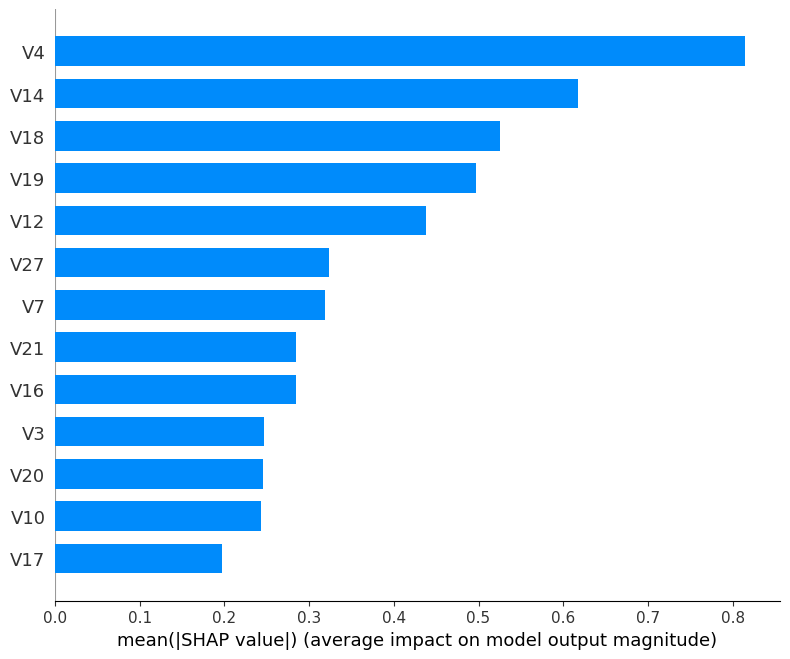

In [ ]:
import shap

# Initialize SHAP explainer with the model
explainer = shap.Explainer(model, X_train_scaled)

# Calculate SHAP values for test set
shap_values = explainer(X_test_scaled)

# Summarize feature importance
shap.summary_plot(shap_values, X_test, plot_type="bar")


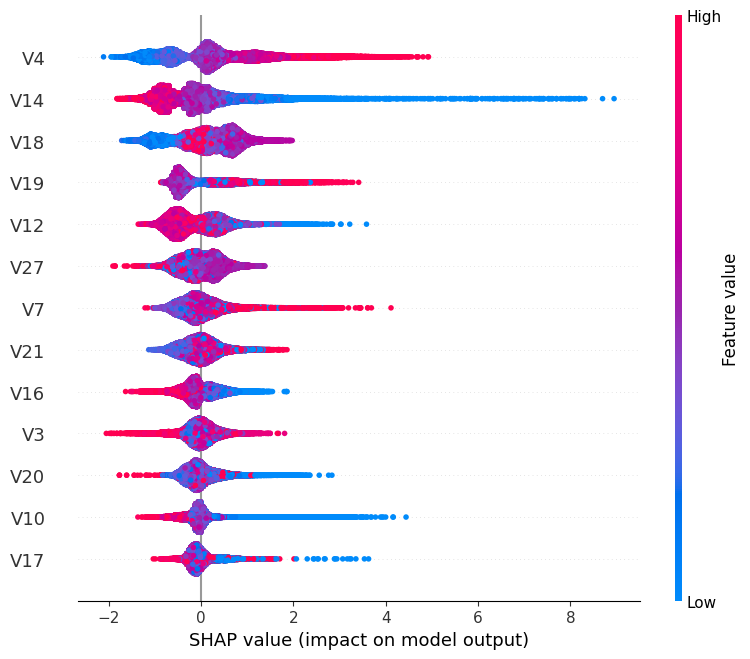

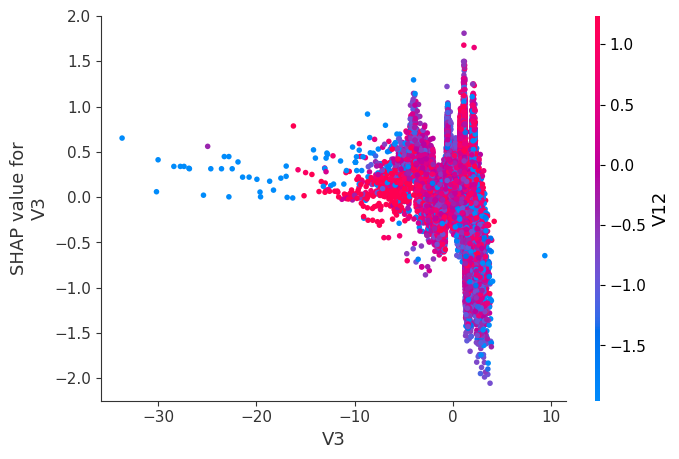

In [ ]:
# SHAP summary plot
shap.summary_plot(shap_values, X_test)

# Example of a SHAP dependence plot for one feature (e.g., 'V3')
shap.dependence_plot("V3", shap_values.values, X_test)


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/content/filtered_creditcard.csv'  # Path to your dataset
data = pd.read_csv(file_path)

# Check for missing values (drop rows with missing values if any)
print("Missing values before preprocessing:", data.isnull().sum().sum())
data = data.dropna()  # Drop rows with missing values (if there are any)

# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'Class' is the fraud label column
y = data['Class']

# Feature scaling (StandardScaler)
scaler = StandardScaler()

# Apply scaling to the features (excluding 'Class')
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets (before balancing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Save preprocessed data for later use
X_train.to_csv('/content/preprocessed_X_train.csv', index=False)
X_test.to_csv('/content/preprocessed_X_test.csv', index=False)
y_train.to_csv('/content/preprocessed_y_train.csv', index=False)
y_test.to_csv('/content/preprocessed_y_test.csv', index=False)

# Print shapes of the datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Missing values before preprocessing: 0
X_train shape: (199364, 13)
X_test shape: (85443, 13)
y_train shape: (199364,)
y_test shape: (85443,)


In [ ]:
#resolve the name error: x_train_res_
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Load the dataset
data = pd.read_csv('/creditcard.csv')  # Update the path if needed

# Separate features and target
X = data.drop(columns=['Class'])  # Assuming 'Class' is the target label for fraud detection
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_res_scaled = scaler.fit_transform(X_train_res)  # Scale the resampled training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Convert the scaled data to PyTorch tensors
X_train_torch = torch.tensor(X_train_res_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_res.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32)

# Now proceed with model training

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
file_path = '/content/filtered_creditcard.csv'  # Path to your uploaded dataset
data = pd.read_csv(file_path)

# Check for missing values
print("Missing values:", data.isnull().sum().sum())

# Drop rows with NaN values
data.dropna(inplace=True)

# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'Class' is the column for fraud labels
y = data['Class']

# Print class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution after balancing
print("Class distribution after SMOTE balancing:", Counter(y_train_res))

# Optional: Save the balanced data to a CSV file
balanced_data = pd.concat([X_train_res, y_train_res], axis=1)
balanced_data.to_csv('/creditcard.csv', index=False)

print("Balanced dataset saved as 'balanced_creditcard.csv'")


Missing values: 8
Class distribution before balancing: Counter({0.0: 55394, 1.0: 156})
Class distribution after SMOTE balancing: Counter({0.0: 38776, 1.0: 38776})
Balanced dataset saved as 'balanced_creditcard.csv'


<ipython-input-10-ffb39a61d6f1>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette='pastel')
<ipython-input-10-ffb39a61d6f1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_res, palette='pastel')


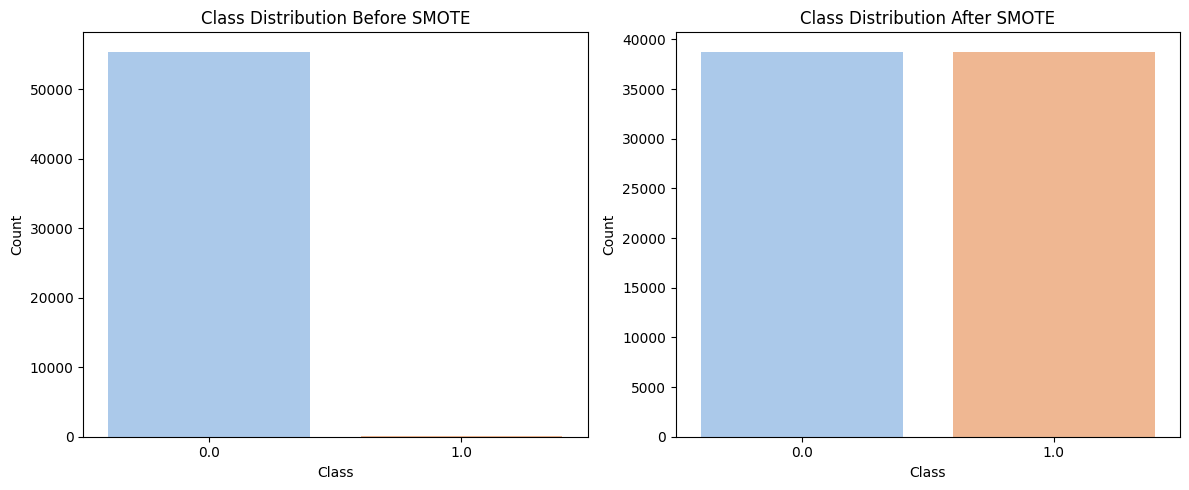

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution before SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='pastel')
plt.title('Class Distribution Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

# Visualize class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_res, palette='pastel')
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
file_path = '/content/filtered_creditcard.csv'  # Path to your uploaded dataset
data = pd.read_csv(file_path)

# Check for missing values
print("Missing values:", data.isnull().sum().sum())

# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'Class' is the column for fraud labels
y = data['Class']

# Print class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution after balancing
print("Class distribution after SMOTE balancing:", Counter(y_train_res))

# Combine the balanced features and target for display
balanced_data = pd.concat([X_train_res, y_train_res], axis=1)

# Show a sample of the balanced data (e.g., the first 10 rows)
print("Sample of the balanced dataset:")
print(balanced_data.head(10))

# Optional: Save the balanced data to a CSV file
balanced_data.to_csv('balanced_creditcard.csv', index=False)
print("Balanced dataset saved as 'balanced_creditcard.csv'")

Missing values: 0
Class distribution before balancing: Counter({0: 284315, 1: 492})
Class distribution after SMOTE balancing: Counter({0: 199020, 1: 199020})
Sample of the balanced dataset:
         V3        V4        V7       V10       V12       V14       V16  \
0  0.163334 -0.756498  0.844608 -0.222719  0.386075  0.418040  0.225934   
1 -2.204096  1.191668  0.919254  0.517022  0.247935  1.242616 -0.136620   
2 -1.399530  0.469764  1.601441  0.086419  0.191335  0.420874 -1.316514   
3 -0.614624 -0.780959  0.046111  0.128383 -0.341516 -0.287098  0.398955   
4  0.283341 -1.786916 -0.198897 -0.283699 -0.180028 -0.388456  0.048084   
5  0.920815  0.289984 -0.604449 -0.319227 -2.391533  1.981181  0.696369   
6  0.397707  0.248333  0.932456 -0.735168  0.178855  0.706125 -0.302763   
7  0.779715  0.307234  0.047407 -0.990627  0.801678  0.287958 -0.155107   
8  1.202277  3.085826 -0.867503  1.105161 -0.147769  0.244094 -0.597706   
9  0.402105  0.095383  0.346798 -0.268738  0.800398  0.30197

In [ ]:
pip install torchdiffeq

In [ ]:
import torch
import torch.nn as nn
from torchdiffeq import odeint

# Define the ODE function
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.linear = nn.Linear(in_features=13, out_features=13)  # Adjusted to 13 features

    def forward(self, t, x):
        return self.linear(x)

# Define the ODE block
class ODEBlock(nn.Module):
    def __init__(self, odefunc):
        super(ODEBlock, self).__init__()
        self.odefunc = odefunc

    def forward(self, x):
        t = torch.tensor([0, 1]).float()
        out = odeint(self.odefunc, x, t)
        return out[1]

# Build the full model
class ODEModel(nn.Module):
    def __init__(self):
        super(ODEModel, self).__init__()
        self.odeblock = ODEBlock(ODEFunc())
        self.fc = nn.Linear(13, 1)  # Adjusted to 13 input features

    def forward(self, x):
        x = self.odeblock(x)
        x = self.fc(x)
        return torch.sigmoid(x)

# Convert data to tensors for Neural ODE
X_train_torch = torch.tensor(X_train_res_scaled, dtype=torch.float32)  # Make sure this has 13 columns
y_train_torch = torch.tensor(y_train_res.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32)

# Initialize the model, define loss and optimizer
model = ODEModel()
criterion = nn.BCELoss()  # Binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(100):  # Adjust epochs based on performance
    optimizer.zero_grad()
    outputs = model(X_train_torch).squeeze()
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch [{epoch}/100], Loss: {loss.item()}")


Epoch [0/100], Loss: 1.1684062480926514
Epoch [10/100], Loss: 1.0414788722991943
Epoch [20/100], Loss: 0.9324038028717041
Epoch [30/100], Loss: 0.8393305540084839
Epoch [40/100], Loss: 0.7602069973945618
Epoch [50/100], Loss: 0.6929410099983215
Epoch [60/100], Loss: 0.6356874108314514
Epoch [70/100], Loss: 0.5869475603103638
Epoch [80/100], Loss: 0.5455314517021179
Epoch [90/100], Loss: 0.5103742480278015


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/trained_model/ode_model_final.pth')

In [ ]:
import torch
import numpy as np

# Assuming the Neural ODE model is already trained and named 'model'

def extract_latent_representations(model, data_tensor):
    """
    Extract latent representations from the Neural ODE model.

    Parameters:
    - model: The trained Neural ODE model
    - data_tensor: The input data tensor

    Returns:
    - Latent representations as a numpy array
    """
    with torch.no_grad():
        # Compute latent representations
        latent_representations = model.odeblock(data_tensor).numpy()  # Convert to numpy array
    return latent_representations

# Convert data to tensors for Neural ODE
X_train_torch = torch.tensor(X_train_res_scaled, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)

# Extract latent representations
X_train_latent = extract_latent_representations(model, X_train_torch)
X_test_latent = extract_latent_representations(model, X_test_torch)

# Check shapes
print(f"Train latent shape: {X_train_latent.shape}")
print(f"Test latent shape: {X_test_latent.shape}")

Train latent shape: (278628, 13)
Test latent shape: (119412, 13)


In [ ]:
# Print a small sample of the latent representations (first 5 examples)
print("First 5 latent representations for the training set:")
print(X_train_latent[:5])

print("\nFirst 5 latent representations for the test set:")
print(X_test_latent[:5])

First 5 latent representations for the training set:
[[-3.9317946   2.5497658  -0.81619185 -1.1645589  -3.3686419  -2.8972285
  -2.3152125  -0.5319513  -3.9289842   4.5186467  -0.600554    2.1244411
  -4.755591  ]
 [ 1.0503423  -0.43470147 -0.0611413   0.06718332  0.82602125  1.1134533
   0.44088632  0.08147484  1.4327527  -0.48781836 -0.35204107 -0.07698232
   0.8335591 ]
 [-3.2764173   2.5310533  -1.6116667  -1.6735148  -2.5053933  -2.9298074
  -1.1878858   0.28077155 -3.2988403   1.8673984  -0.06382485  0.33160797
  -0.41337034]
 [-0.14368169  0.2599645   0.19425009 -0.2896141  -0.5198946   0.27344695
  -0.3377836  -0.33586735 -0.27075347  1.8631517  -0.06756087  0.07782657
  -0.19566461]
 [ 0.90901804 -0.8376423   0.24999945  0.14941955  0.7450175   0.9977548
   0.6519094   0.06499013  1.1345785  -0.63500273 -0.09805357 -0.15529697
   0.54959184]]

First 5 latent representations for the test set:
[[ 0.922395   -0.41629115 -0.08096834  0.40198863  1.222413    1.1789056
   0.4642464 

In [ ]:
import numpy as np

print("Training latent representation statistics:")
print(f"Mean: {np.mean(X_train_latent)}")
print(f"Standard Deviation: {np.std(X_train_latent)}")

print("\nTest latent representation statistics:")
print(f"Mean: {np.mean(X_test_latent)}")
print(f"Standard Deviation: {np.std(X_test_latent)}")

Training latent representation statistics:
Mean: 0.0295419879257679
Standard Deviation: 1.2393585443496704

Test latent representation statistics:
Mean: 0.03159961849451065
Standard Deviation: 1.2353429794311523


In [ ]:
pip install xgboost

In [ ]:
import torch
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Ensure the ODEModel class and other necessary imports are available

# Load the saved ODE model from Google Drive (adjust the path if needed)
model = ODEModel()  # Redefine the ODEModel class before this if necessary
model.load_state_dict(torch.load('/content/drive/MyDrive/trained_model/ode_model_final.pth'))
model.eval()  # Set the model to evaluation mode

# Function to extract latent features from the ODE block
def extract_latent_features(odeblock, X):
    t = torch.tensor([0, 1]).float()  # Time span for ODE
    X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert to tensor
    latent_features = odeblock(X_tensor)  # Extract latent features from the ODE block
    return latent_features.detach().numpy()

# Extract latent features from the training set using the ODE block
X_train_latent = extract_latent_features(model.odeblock, X_train_res_scaled)

# Train XGBoost on latent representations
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4)
xgb_model.fit(X_train_latent, y_train_res)

# Preprocess the test set and extract latent features
X_test_latent = extract_latent_features(model.odeblock, X_test_scaled)

# Predict using XGBoost
y_pred = xgb_model.predict(X_test_latent)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

print(f'XGBoost Accuracy on test set: {accuracy:.4f}')

<ipython-input-28-92beaa280870>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/trained_model/ode_model_final.pth')

XGBoost Accuracy on test set: 0.9619


Confusion Matrix:
 [[58564  1142]
 [ 3402 56304]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     59706
           1       0.98      0.94      0.96     59706

    accuracy                           0.96    119412
   macro avg       0.96      0.96      0.96    119412
weighted avg       0.96      0.96      0.96    119412

ROC-AUC Score: 0.9948


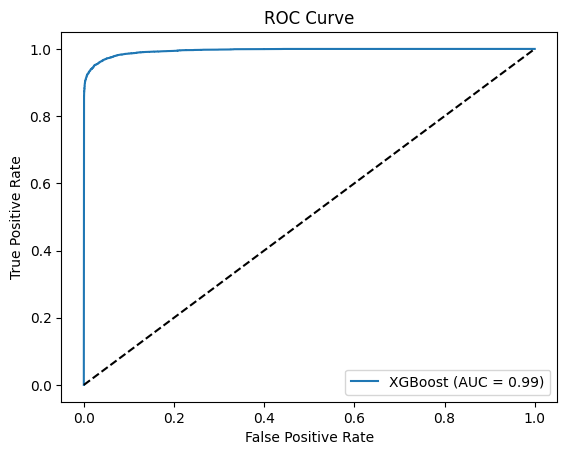

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
y_pred_proba = xgb_model.predict_proba(X_test_latent)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {auc:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


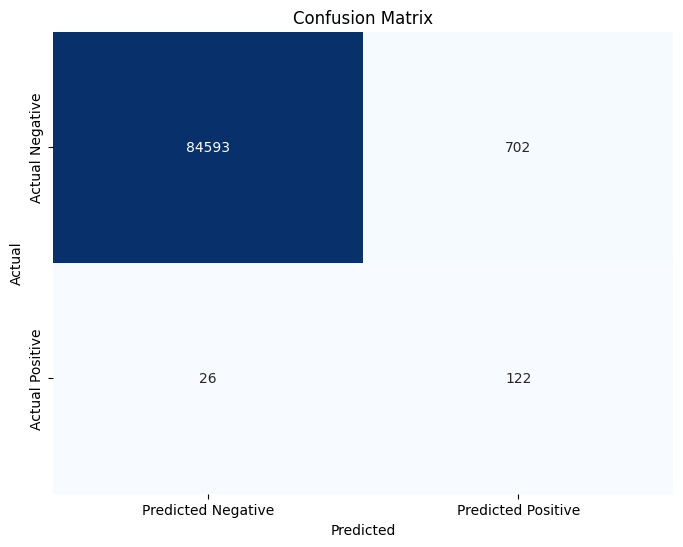

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix values
cm = [[84593, 702], [26, 122]]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels, title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

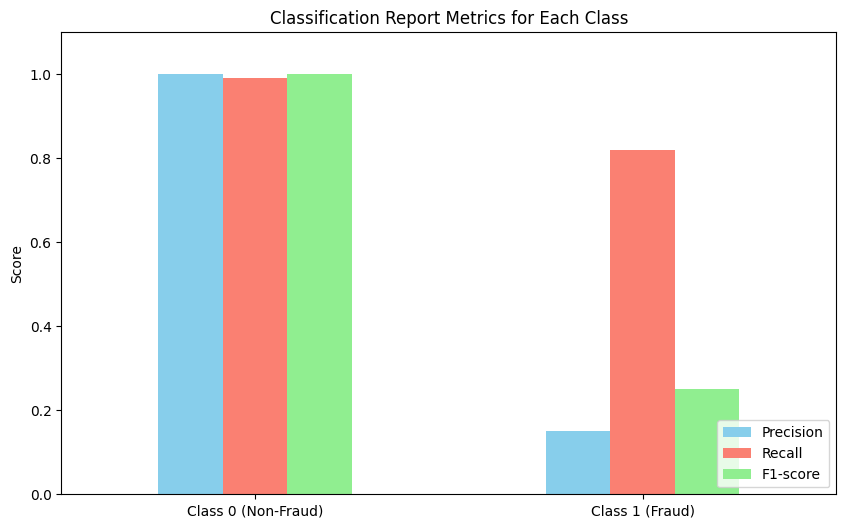

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the classification report
metrics = {
    'Precision': [1.00, 0.15],
    'Recall': [0.99, 0.82],
    'F1-score': [1.00, 0.25]
}

classes = ['Class 0 (Non-Fraud)', 'Class 1 (Fraud)']

# Create a DataFrame from the metrics
metrics_df = pd.DataFrame(metrics, index=classes)

# Plotting
metrics_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Classification Report Metrics for Each Class')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Perform the grid search on the latent features from Neural ODE
grid_search.fit(X_train_latent, y_train_res)

# Print the best parameters found by Grid Search
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Predict using the best XGBoost model
y_pred = best_model.predict(X_test_latent)
accuracy = accuracy_score(y_test, y_pred)

print(f'Optimized XGBoost Accuracy on test set: {accuracy:.4f}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits


ValueError: 
All the 324 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
324 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1512, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 596, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1008, in _create_dmatrix
    return DMatrix(**kwargs, nthread=self.n_jobs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 878, in __init__
    handle, feature_names, feature_types = dispatch_data_backend(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/data.py", line 1258, in dispatch_data_backend
    array = np.asarray(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/_tensor.py", line 1149, in __array__
    return self.numpy()
RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.


In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.1 MB/s eta 0:00:00


In [ ]:
best_params = grid_search.best_params_
xgb_model_tuned = xgb.XGBClassifier(**best_params)
xgb_model_tuned.fit(X_train_latent, y_train_res)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
'''V17, V14, V12, V10, V16: Given their high correlation with fraud, these features might reflect suspicious activity patterns,
like unusual transaction frequencies, amounts, or merchant types.'''
'''V3, V7, V11: These could indicate patterns of spending or withdrawals,
such as the time and day of transactions or consistency in spending that deviates from the norm.'''
'''V4: With its moderate correlation, it could relate to transactional relationships,
such as similarity to previous transactions (same location, similar time, etc.).'''

import pandas as pd

# Load the dataset (replace with your file path in Colab if different)
data = pd.read_csv('/creditcard.csv')

# Define selected features
selected_features = [
    'V3', 'V4', 'V7', 'V10', 'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V27', 'Class'
]

# Create a new DataFrame with only the selected features
filtered_data = data[selected_features]

# Save the filtered dataset as a new CSV file
filtered_data.to_csv('/filtered_creditcard.csv', index=False)

print("Filtered dataset saved as 'filtered_creditcard.csv'.")

Filtered dataset saved as 'filtered_creditcard.csv'.


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = '/filtered_creditcard.csv'  # Path to your dataset
data = pd.read_csv(file_path)

# Check for missing values (drop rows with missing values if any)
print("Missing values before preprocessing:", data.isnull().sum().sum())
data = data.dropna()  # Drop rows with missing values (if there are any)

# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'Class' is the fraud label column
y = data['Class']

# Feature scaling (StandardScaler)
scaler = StandardScaler()

# Apply scaling to the features (excluding 'Class')
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the dataset into training and testing sets (before balancing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Save preprocessed data for later use
X_train.to_csv('/content/preprocessed_X_train.csv', index=False)
X_test.to_csv('/content/preprocessed_X_test.csv', index=False)
y_train.to_csv('/content/preprocessed_y_train.csv', index=False)
y_test.to_csv('/content/preprocessed_y_test.csv', index=False)

# Print shapes of the datasets to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Missing values before preprocessing: 0
X_train shape: (199364, 13)
X_test shape: (85443, 13)
y_train shape: (199364,)
y_test shape: (85443,)


In [ ]:
#resolve the name error: x_train_res_
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch

# Load the dataset
data = pd.read_csv('/creditcard.csv')  # Update the path if needed

# Separate features and target
X = data.drop(columns=['Class'])  # Assuming 'Class' is the target label for fraud detection
y = data['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test sets
X_train_res_scaled = scaler.fit_transform(X_train_res)  # Scale the resampled training data
X_test_scaled = scaler.transform(X_test)  # Scale the test data

# Convert the scaled data to PyTorch tensors
X_train_torch = torch.tensor(X_train_res_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train_res.values, dtype=torch.float32)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32)

# Now proceed with model training

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the dataset
file_path = '/filtered_creditcard.csv'  # Path to your uploaded dataset
data = pd.read_csv(file_path)

# Check for missing values
print("Missing values:", data.isnull().sum().sum())

# Separate features and target variable
X = data.drop(columns=['Class'])  # Assuming 'Class' is the column for fraud labels
y = data['Class']

# Print class distribution before balancing
print("Class distribution before balancing:", Counter(y))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print class distribution after balancing
print("Class distribution after SMOTE balancing:", Counter(y_train_res))

# Combine the balanced features and target for display
balanced_data = pd.concat([X_train_res, y_train_res], axis=1)

# Show a sample of the balanced data (e.g., the first 10 rows)
print("Sample of the balanced dataset:")
print(balanced_data.head(10))

Missing values: 0
Class distribution before balancing: Counter({0: 284315, 1: 492})
Class distribution after SMOTE balancing: Counter({0: 199020, 1: 199020})
Sample of the balanced dataset:
         V3        V4        V7       V10       V12       V14       V16  \
0  0.163334 -0.756498  0.844608 -0.222719  0.386075  0.418040  0.225934   
1 -2.204096  1.191668  0.919254  0.517022  0.247935  1.242616 -0.136620   
2 -1.399530  0.469764  1.601441  0.086419  0.191335  0.420874 -1.316514   
3 -0.614624 -0.780959  0.046111  0.128383 -0.341516 -0.287098  0.398955   
4  0.283341 -1.786916 -0.198897 -0.283699 -0.180028 -0.388456  0.048084   
5  0.920815  0.289984 -0.604449 -0.319227 -2.391533  1.981181  0.696369   
6  0.397707  0.248333  0.932456 -0.735168  0.178855  0.706125 -0.302763   
7  0.779715  0.307234  0.047407 -0.990627  0.801678  0.287958 -0.155107   
8  1.202277  3.085826 -0.867503  1.105161 -0.147769  0.244094 -0.597706   
9  0.402105  0.095383  0.346798 -0.268738  0.800398  0.30197

In [ ]:
pip install torchdiffeq

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
from torchdiffeq import odeint  # Assuming you're using torchdiffeq for ODE operations

# Define the ODE function
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.linear = nn.Linear(in_features=13, out_features=13)  # Adjusted to 13 features

    def forward(self, t, x):
        return self.linear(x)

# Define the ODE block
class ODEBlock(nn.Module):
    def __init__(self, odefunc):
        super(ODEBlock, self).__init__()
        self.odefunc = odefunc

    def forward(self, x):
        t = torch.tensor([0, 1]).float()  # Integrate over time interval
        out = odeint(self.odefunc, x, t)
        return out[1]  # Return the evolved features at t=1

# Define the full model
class ODEModel(nn.Module):
    def __init__(self):
        super(ODEModel, self).__init__()
        self.odeblock = ODEBlock(ODEFunc())
        self.fc = nn.Linear(13, 1)  # Adjusted to 13 input features

    def forward(self, x):
        x = self.odeblock(x)
        x = self.fc(x)
        return torch.sigmoid(x)

# Mount Google Drive to access the saved model
from google.colab import drive
drive.mount('/content/drive')

# Initialize the model and load the saved state
model = ODEModel()
model.load_state_dict(torch.load('/content/drive/MyDrive/trained_model/ode_model_final.pth'))

# Set the model to evaluation mode for inference
model.eval()

print("Model successfully loaded and ready for inference!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model successfully loaded and ready for inference!


<ipython-input-24-2e628936faa2>:44: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/trained_model/ode_model_final.pth'

In [ ]:
import torch
import torch.nn as nn
from torchdiffeq import odeint

# Define the ODE function
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.linear = nn.Linear(in_features=13, out_features=13)  # Keep the original input size

    def forward(self, t, x):
        return self.linear(x)

# Define the ODE block
class ODEBlock(nn.Module):
    def __init__(self, odefunc):
        super(ODEBlock, self).__init__()
        self.odefunc = odefunc

    def forward(self, x):
        t = torch.tensor([0, 1]).float()  # Integrate over time interval
        out = odeint(self.odefunc, x, t)
        return out[1]  # Return the evolved features at t=1

# Define the full model
class ODEModel(nn.Module):
    def __init__(self):
        super(ODEModel, self).__init__()
        self.odeblock = ODEBlock(ODEFunc())
        self.fc = nn.Linear(13, 1)  # Keep it the same

    def forward(self, x):
        x = self.odeblock(x)
        x = self.fc(x)
        return torch.sigmoid(x)

    def get_latent_representation(self, x):
        return self.odeblock(x)  # Return output of ODE block

# Mount Google Drive to access the saved model
from google.colab import drive
drive.mount('/content/drive')

# Initialize the model and load the saved state
model = ODEModel()
model.load_state_dict(torch.load('/content/drive/MyDrive/trained_model/ode_model_final.pth'))

# Set the model to evaluation mode for inference
model.eval()

print("Model successfully loaded and ready for inference!")

# Convert data to tensors for Neural ODE
X_train_torch = torch.tensor(X_train_res_scaled[:, :13], dtype=torch.float32)  # Adjust to match the model input
X_test_torch = torch.tensor(X_test_scaled[:, :13], dtype=torch.float32)  # Adjust to match the model input

# Extract latent representations
X_train_latent = model.get_latent_representation(X_train_torch)
X_test_latent = model.get_latent_representation(X_test_torch)

# Check shapes
print(f"Train latent shape: {X_train_latent.shape}")
print(f"Test latent shape: {X_test_latent.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model successfully loaded and ready for inference!


<ipython-input-38-29bbda13c89c>:46: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/trained_model/ode_model_final.pth'

Train latent shape: torch.Size([398040, 13])
Test latent shape: torch.Size([85443, 13])


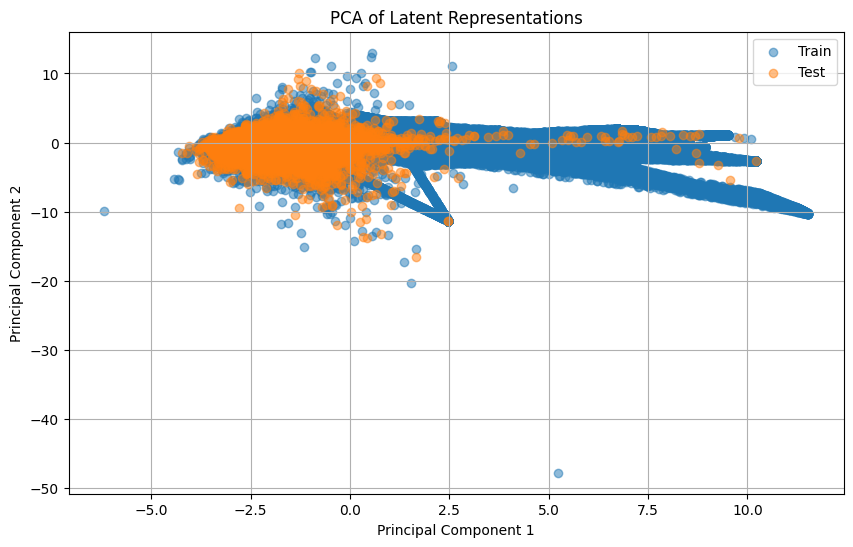

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np

# Assuming X_train_latent and X_test_latent are already defined
# Convert to numpy arrays for PCA
X_train_latent_np = X_train_latent.detach().numpy()  # Detach and convert to numpy
X_test_latent_np = X_test_latent.detach().numpy()    # Detach and convert to numpy

# Combine train and test for visualization (if desired)
combined_latent = np.vstack((X_train_latent_np, X_test_latent_np))

# Perform PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
reduced_latent = pca.fit_transform(combined_latent)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_latent[:X_train_latent_np.shape[0], 0], reduced_latent[:X_train_latent_np.shape[0], 1], label='Train', alpha=0.5)
plt.scatter(reduced_latent[X_train_latent_np.shape[0]:, 0], reduced_latent[X_train_latent_np.shape[0]:, 1], label='Test', alpha=0.5)
plt.title('PCA of Latent Representations')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Print a small sample of the latent representations (first 5 examples)
print("First 5 latent representations for the training set:")
print(X_train_latent[:5])

print("\nFirst 5 latent representations for the test set:")
print(X_test_latent[:5])

First 5 latent representations for the training set:
tensor([[ 1.7293e+00,  2.0148e-01, -5.4405e-01,  1.3815e-02, -8.8295e-01,
          6.2505e-01, -3.2018e-01,  8.0958e-01,  3.7547e-01, -8.9508e-02,
          3.7041e-01, -6.3432e-01,  4.2797e-01],
        [ 1.2140e+00,  7.0709e-01, -5.5108e-01, -1.5888e-01, -1.1401e-01,
          5.1250e-01, -4.9081e-01,  8.7632e-01,  8.4091e-02,  2.2649e-01,
          4.5692e-01, -5.4286e-01,  4.4373e-01],
        [ 1.7474e-04,  1.4638e-01, -1.5515e+00,  2.5596e-01, -3.8788e-01,
         -3.7736e-01,  2.8094e-01,  1.0600e+00, -5.7374e-01, -3.5545e-02,
         -2.7187e-01, -2.2198e-01,  2.0080e-01],
        [ 1.2281e-01,  3.4920e-01, -1.2595e-01, -2.5430e-01, -1.5821e+00,
          1.9653e+00,  2.0731e+00,  6.0149e-01,  1.1661e-01,  2.2151e-01,
         -1.0047e-01, -5.9851e-01,  2.5296e-01],
        [ 1.6891e+00,  2.2437e-01, -4.2597e-01, -2.6114e-01, -1.9711e+00,
          2.1029e+00,  2.3831e+00,  8.1769e-01,  5.8946e-01,  7.7085e-04,
         -6

In [ ]:
# Assuming X_train_latent is already defined
X_train_latent_np = X_train_latent.detach().numpy()  # Detach and convert to numpy

# Calculate and print statistics
print("Training latent representation statistics:")
print(f"Mean: {np.mean(X_train_latent_np)}")
print(f"Standard Deviation: {np.std(X_train_latent_np)}")


Training latent representation statistics:
Mean: 0.02954196184873581
Standard Deviation: 1.0663174390792847


In [ ]:
# Assuming X_test_latent is already defined
X_test_latent_np = X_test_latent.detach().numpy()  # Detach and convert to numpy

# Calculate and print statistics for the test latent representations
print("Test latent representation statistics:")
print(f"Mean: {np.mean(X_test_latent_np)}")
print(f"Standard Deviation: {np.std(X_test_latent_np)}")


Test latent representation statistics:
Mean: 0.10141546279191971
Standard Deviation: 0.7238421440124512


In [ ]:
pip install xgboost

In [ ]:
import torch
import xgboost as xgb
from sklearn.metrics import accuracy_score
import numpy as np

# Load the saved ODE model from Google Drive (adjust the path if needed)
model = ODEModel()  # Ensure the ODEModel class is defined before this
model.load_state_dict(torch.load('/content/drive/MyDrive/trained_model/ode_model_final.pth', weights_only=True))
model.eval()  # Set the model to evaluation mode

# Function to extract latent features from the ODE model
def extract_latent_features(odeblock, X):
    X_tensor = torch.tensor(X, dtype=torch.float32)  # Convert to tensor
    latent_features = odeblock(X_tensor)  # Extract latent features from the ODE block
    return latent_features.detach().numpy()

# Define the indices or names of the 13 features you used during training
# Assuming the indices of the 13 features are known (e.g., [0, 1, 2, ..., 12])
selected_feature_indices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Update this based on your actual features

# Filter the datasets to keep only the 13 relevant features
X_train_filtered = X_train_res_scaled[:, selected_feature_indices]
X_test_filtered = X_test_scaled[:, selected_feature_indices]

# Check the shape of the filtered data
print(f'Filtered X_train shape: {X_train_filtered.shape}')
print(f'Filtered X_test shape: {X_test_filtered.shape}')

# Extract latent features from the training and test sets
X_train_latent = extract_latent_features(model.odeblock, X_train_filtered)  # Should now be 13 features
X_test_latent = extract_latent_features(model.odeblock, X_test_filtered)  # Should now be 13 features

# Train XGBoost on the latent representations
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.05, max_depth=4)
xgb_model.fit(X_train_latent, y_train_res)  # y_train_res should be your training labels

# Predict using XGBoost
y_pred = xgb_model.predict(X_test_latent)

# Evaluate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)  # y_test should be your test labels

print(f'XGBoost Accuracy on test set: {accuracy:.4f}')



Filtered X_train shape: (398040, 13)
Filtered X_test shape: (85443, 13)
XGBoost Accuracy on test set: 0.9858


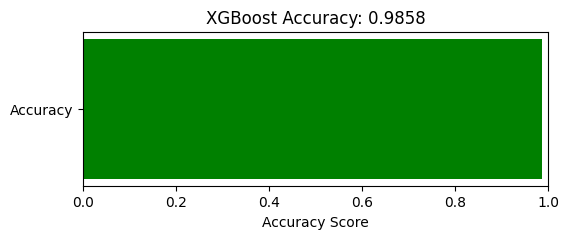

In [ ]:
import matplotlib.pyplot as plt
accuracy = 0.9858  # Your accuracy
plt.figure(figsize=(6, 2))
plt.barh(['Accuracy'], [accuracy], color='green')
plt.xlim(0, 1)
plt.title(f'XGBoost Accuracy: {accuracy:.4f}')
plt.xlabel('Accuracy Score')
plt.show()

Confusion Matrix:
 [[84111  1184]
 [   26   122]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.09      0.82      0.17       148

    accuracy                           0.99     85443
   macro avg       0.55      0.91      0.58     85443
weighted avg       1.00      0.99      0.99     85443

ROC-AUC Score: 0.9548


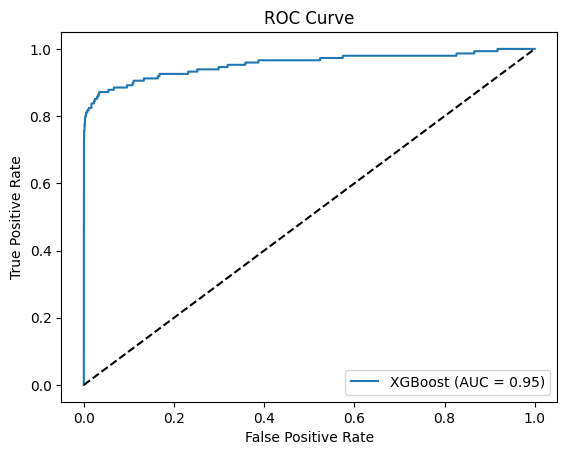

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC Score
y_pred_proba = xgb_model.predict_proba(X_test_latent)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC-AUC Score: {auc:.4f}')

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


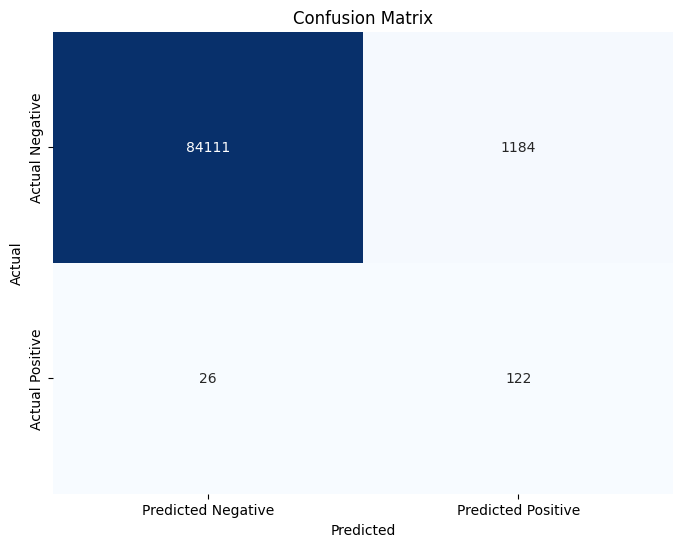

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix values
cm = [[84111, 1184], [26, 122]]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])

# Add labels, title
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, roc_curve, auc

# Your existing classification report output
report = {
    '0': {'precision': 1.00, 'recall': 0.99, 'f1-score': 0.99, 'support': 85295},
    '1': {'precision': 0.09, 'recall': 0.82, 'f1-score': 0.17, 'support': 148},
}

# Convert the report into a DataFrame
report_df = pd.DataFrame(report).T
report_df['class'] = report_df.index
report_df.reset_index(drop=True, inplace=True)


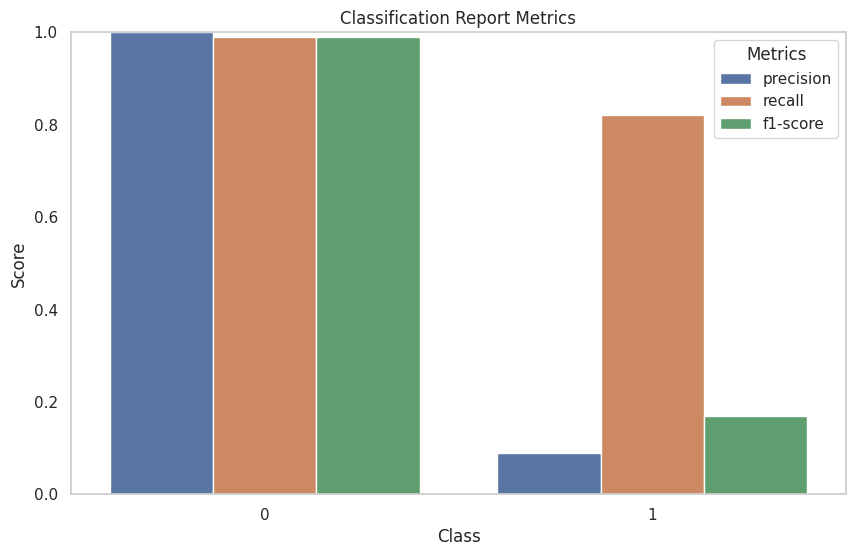

In [ ]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for precision, recall, and f1-score
plt.figure(figsize=(10, 6))
report_df.melt(id_vars='class', value_vars=['precision', 'recall', 'f1-score'],
                var_name='metric', value_name='value').pipe(
    sns.barplot, x='class', y='value', hue='metric'
)

plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.ylim(0, 1)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

# Set up the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)

# Perform the grid search on the latent features from Neural ODE
grid_search.fit(X_train_latent, y_train_res)

# Print the best parameters found by Grid Search
print(f"Best parameters found: {grid_search.best_params_}")

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Predict using the best XGBoost model
y_pred = best_model.predict(X_test_latent)
accuracy = accuracy_score(y_test, y_pred)

print(f'Optimized XGBoost Accuracy on test set: {accuracy:.4f}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Optimized XGBoost Accuracy on test set: 0.9973


In [ ]:
# Save the best model
best_model.save_model('/content/drive/MyDrive/trained_model/xgboost_best_model.json')
print("XGBoost model saved successfully.")

XGBoost model saved successfully.


In [ ]:
'''# Load the saved XGBoost model
loaded_model = xgb.XGBClassifier()
loaded_model.load_model('/content/drive/MyDrive/trained_model/xgboost_best_model.json')

# Now you can use loaded_model for predictions
y_pred_loaded = loaded_model.predict(X_test_latent)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)

print(f'Loaded XGBoost Accuracy on test set: {accuracy_loaded:.4f}')'''

In [ ]:
best_params = grid_search.best_params_
xgb_model_tuned = xgb.XGBClassifier(**best_params)
xgb_model_tuned.fit(X_train_latent, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_tuned = xgb_model_tuned.predict(X_test_latent)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'XGBoost Tuned Accuracy: {accuracy_tuned:.4f}')
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tuned))

XGBoost Tuned Accuracy: 0.9973
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.37      0.80      0.51       148

    accuracy                           1.00     85443
   macro avg       0.69      0.90      0.75     85443
weighted avg       1.00      1.00      1.00     85443

Confusion Matrix:
 [[85098   197]
 [   30   118]]


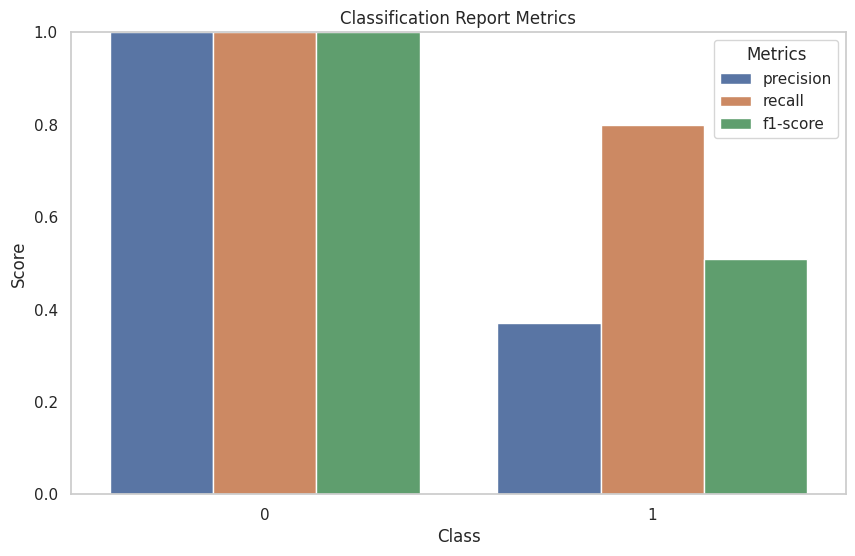

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Your classification report data
report = {
    '0': {'precision': 1.00, 'recall': 1.00, 'f1-score': 1.00, 'support': 85295},
    '1': {'precision': 0.37, 'recall': 0.80, 'f1-score': 0.51, 'support': 148},
}

# Convert the report into a DataFrame
report_df = pd.DataFrame(report).T
report_df['class'] = report_df.index
report_df.reset_index(drop=True, inplace=True)

# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for precision, recall, and f1-score
plt.figure(figsize=(10, 6))
report_df.melt(id_vars='class', value_vars=['precision', 'recall', 'f1-score'],
                var_name='metric', value_name='value').pipe(
    sns.barplot, x='class', y='value', hue='metric'
)

plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xlabel('Class')
plt.ylim(0, 1)
plt.legend(title='Metrics')
plt.grid(axis='y')
plt.show()


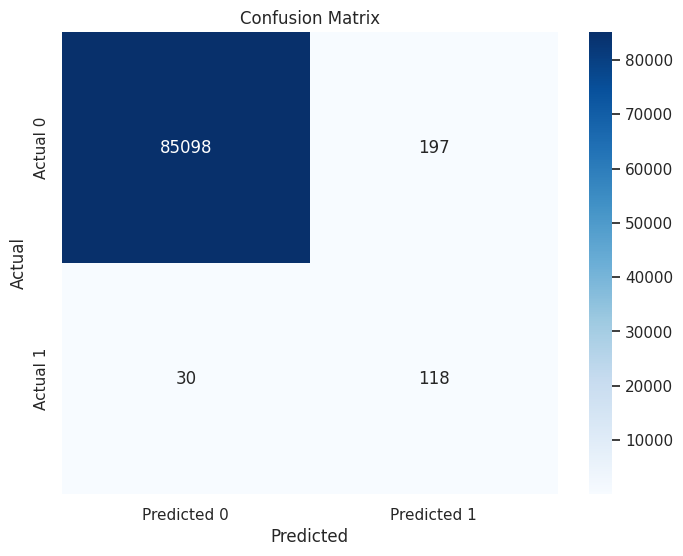

In [ ]:
# Your confusion matrix
conf_matrix = np.array([[85098, 197],
                        [30, 118]])

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


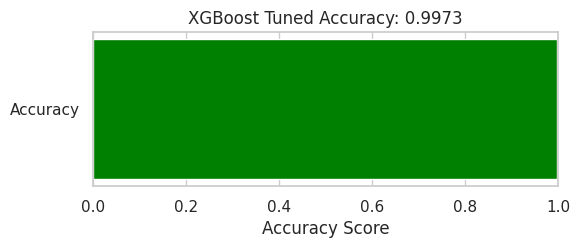

In [ ]:
# Display accuracy
accuracy = 0.9973  # Your accuracy
plt.figure(figsize=(6, 2))
plt.barh(['Accuracy'], [accuracy], color='green')
plt.xlim(0, 1)
plt.title(f'XGBoost Tuned Accuracy: {accuracy:.4f}')
plt.xlabel('Accuracy Score')
plt.show()
